## Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

*hleper function*

In [2]:
# Preprocess Movies Data
import ast

def parse_genres(genre_string):
    try:
        genres = ast.literal_eval(genre_string)  # Convert string to list of dictionaries
        return [g['name'] for g in genres]  # Extract genre names
    except (ValueError, SyntaxError):
        return []

#### Load Data

In [3]:
# Set up input and output paths
RAW_DATA_DIR = '../data/raw'
PROCESSED_DATA_DIR = '../data/processed'

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

# Load raw data
movies_file = os.path.join(RAW_DATA_DIR, 'movies_metadata.csv')
ratings_file = os.path.join(RAW_DATA_DIR, 'ratings_small.csv')

movies = pd.read_csv(movies_file)
ratings = pd.read_csv(ratings_file)

display(movies.head())
display(ratings.head())

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


#### Data Parsing

In [4]:
movies['genres'] = movies['genres'].apply(parse_genres)
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

# Select relevant columns and drop rows with missing values
movies_cleaned = movies[['id', 'title', 'genres', 'release_year', 'popularity', 'vote_average', 'vote_count']]
movies_cleaned.dropna(subset=['id', 'title'], inplace=True)
display(movies_cleaned.head())

# Preprocess Ratings Data
ratings_cleaned = ratings[['userId', 'movieId', 'rating']]
display(ratings_cleaned.head())

,id,title,genres,release_year,popularity,vote_average,vote_count
0,862,Toy Story,"[Animation, Comedy, Family]",1995.0,21.946943,7.7,5415.0
1,8844,Jumanji,"[Adventure, Fantasy, Family]",1995.0,17.015539,6.9,2413.0
2,15602,Grumpier Old Men,"[Romance, Comedy]",1995.0,11.7129,6.5,92.0
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0,3.859495,6.1,34.0
4,11862,Father of the Bride Part II,[Comedy],1995.0,8.387519,5.7,173.0


,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


## EDA Visualizations

#### 1. Distribution of release years

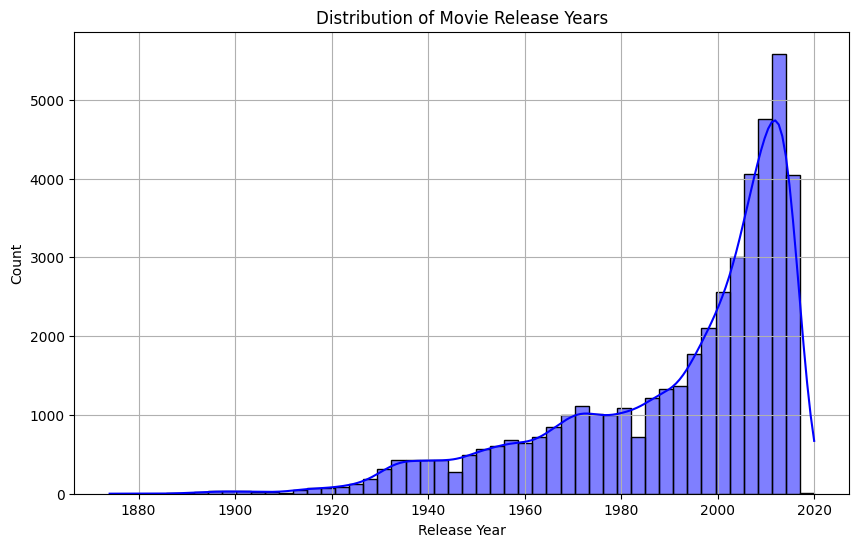

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned['release_year'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid()
plt.show()

#### 2. Top 10 most common genres

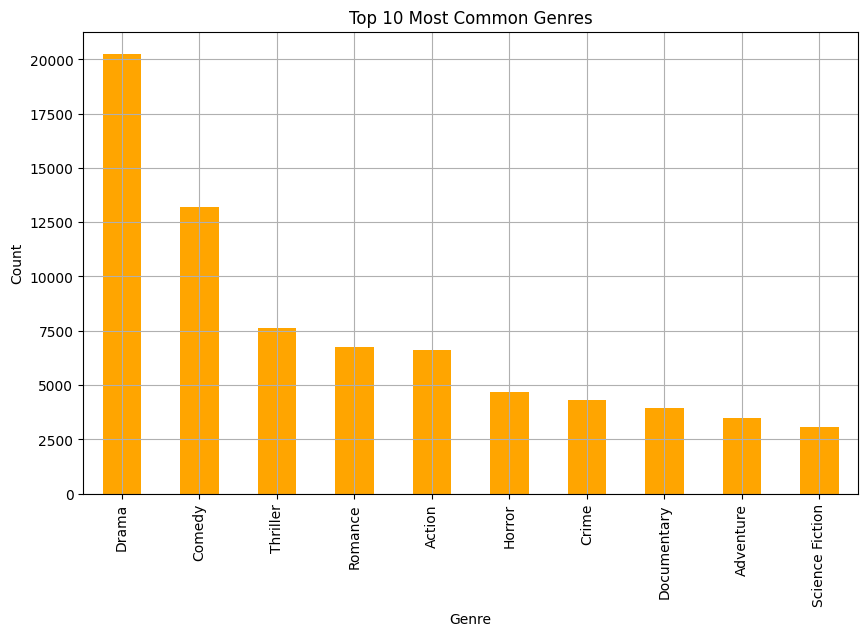

In [6]:
genre_counts = pd.Series([genre for genres_list in movies_cleaned['genres'] for genre in genres_list]).value_counts()
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.grid()
plt.show()

#### 3. Distribution of movie popularity

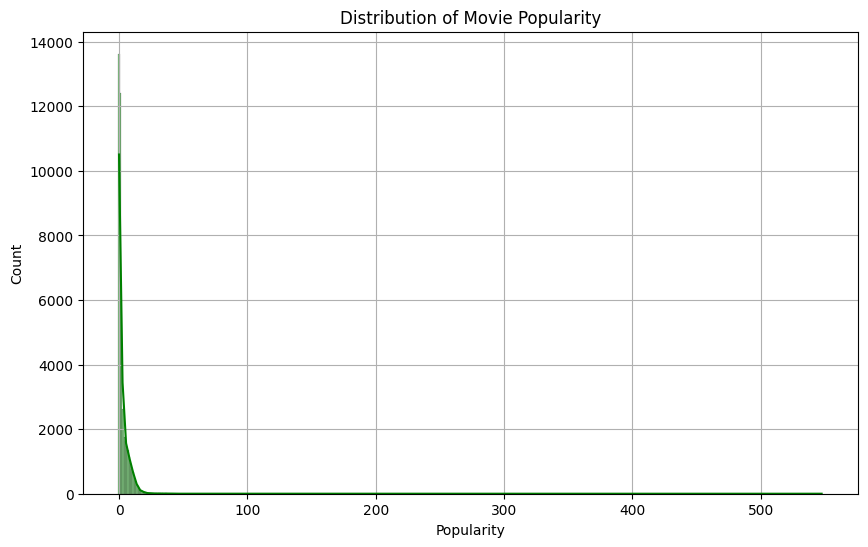

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned['popularity'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid()
plt.show()

#### 4. Distribution of vote averages

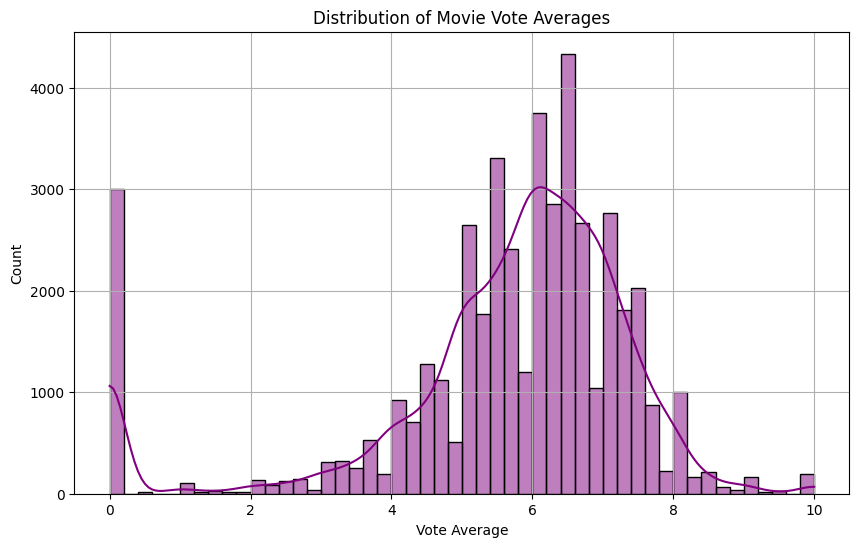

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned['vote_average'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.grid()
plt.show()

#### 5. Ratings distribution

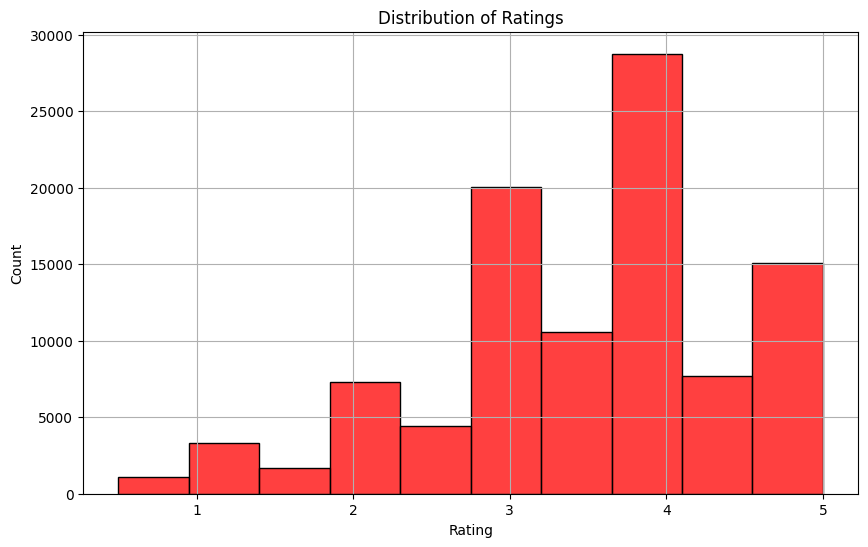

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_cleaned['rating'], bins=10, kde=False, color='red')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

#### 6. Number of ratings per movie (Top 10 most rated movies)

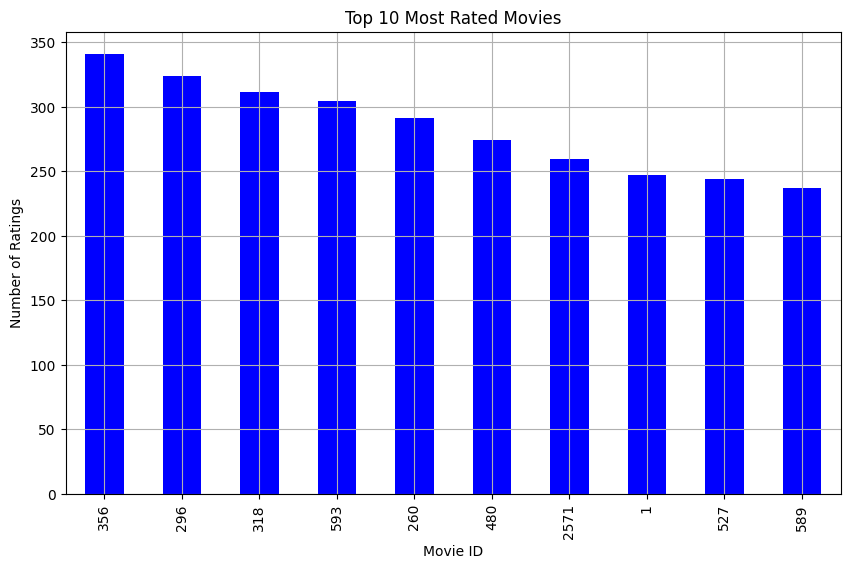

In [10]:
ratings_count = ratings_cleaned.groupby('movieId').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ratings_count.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.grid()
plt.show()

### Save Preprocessed Data

In [11]:
# Save processed data
movies_output_path = os.path.join(PROCESSED_DATA_DIR, 'movies_cleaned.csv')
ratings_output_path = os.path.join(PROCESSED_DATA_DIR, 'ratings_cleaned.csv')

movies_cleaned.to_csv(movies_output_path, index=False)
ratings_cleaned.to_csv(ratings_output_path, index=False)

print(f"Movies data cleaned and saved to {movies_output_path}")
print(f"Ratings data cleaned and saved to {ratings_output_path}")

Movies data cleaned and saved to ../data/processed\movies_cleaned.csv
Ratings data cleaned and saved to ../data/processed\ratings_cleaned.csv
